In [6]:
%load_ext autoreload
%autoreload 2

from imaka.reduce.nights import reduce_2017_01_13
from imaka.analysis import plot_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fetch stats from onaga to local machine

All the stats files should be kept on onaga. But to sync up with this machine, you can run the following utility. You will probably need to run this in an ipython window rather than from the Jupyter notebook.


In [3]:
plot_stats.fetch_stats_from_onaga(['20170113'], '/Users/jlu/work/imaka/pleiades/')

imaka@onaga.ifa.hawaii.edu:/Volumes/DATA/imaka/20170113/fli/reduce/stats/stats*.fits
/Users/jlu/work/imaka/pleiades//20170113/fli/reduce/stats/


## Plot Statistics

Below we will make a suite of standard plots. Note the various statistics are plotted against frame number and time (UTC). Recall that we had two data sets for this night:

1. Pleiades East - FLI in East Orientation (data set suffix = 1)
2. Pleiades East - FLI in West Orientation (data set suffix = 2)


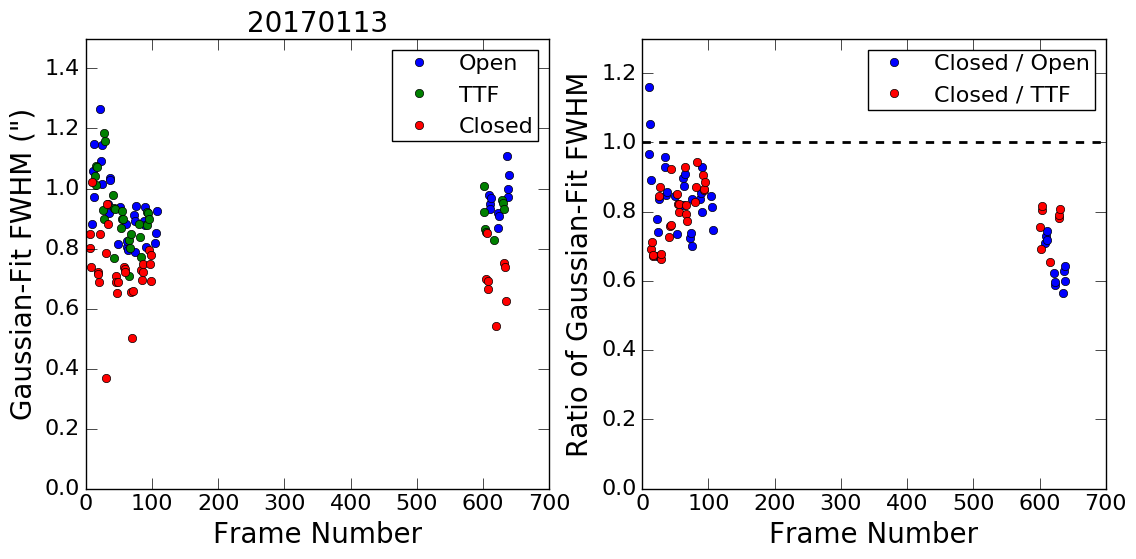

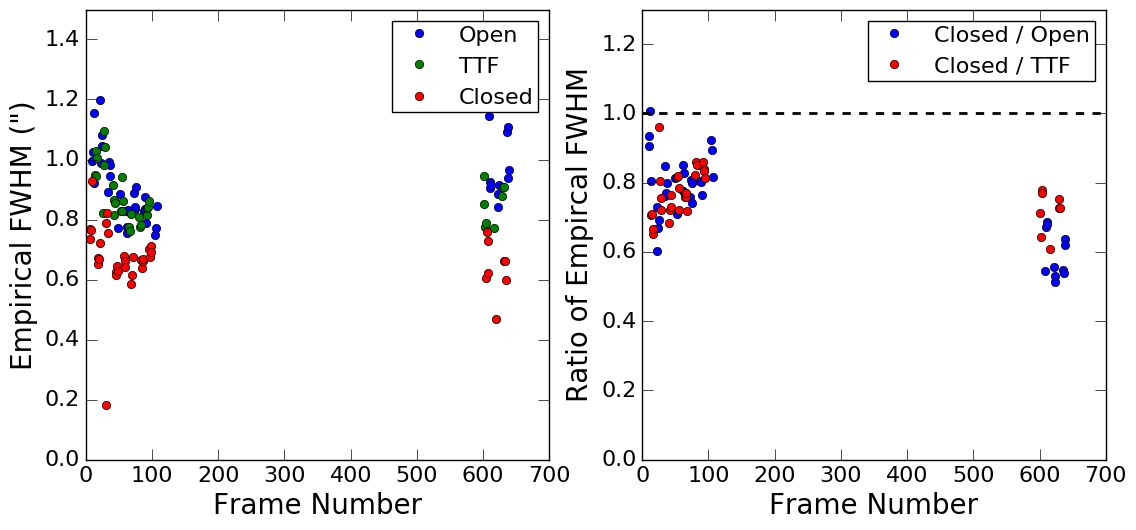

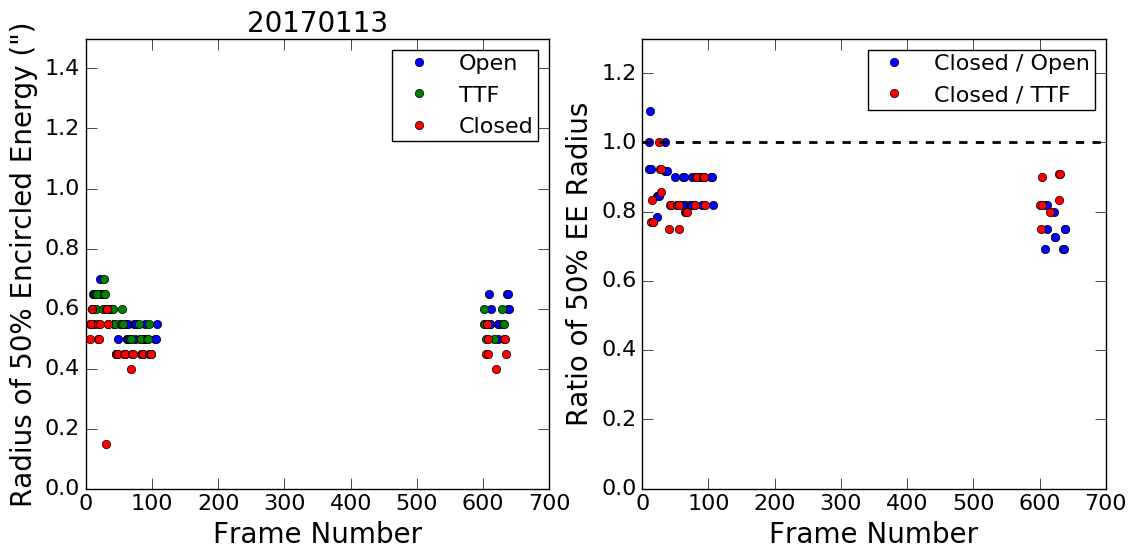

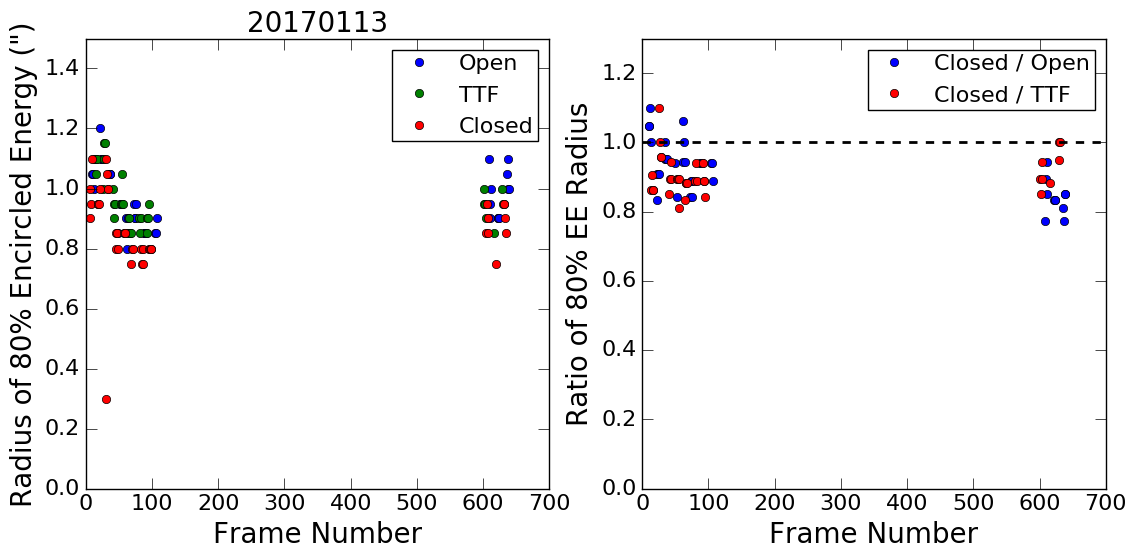

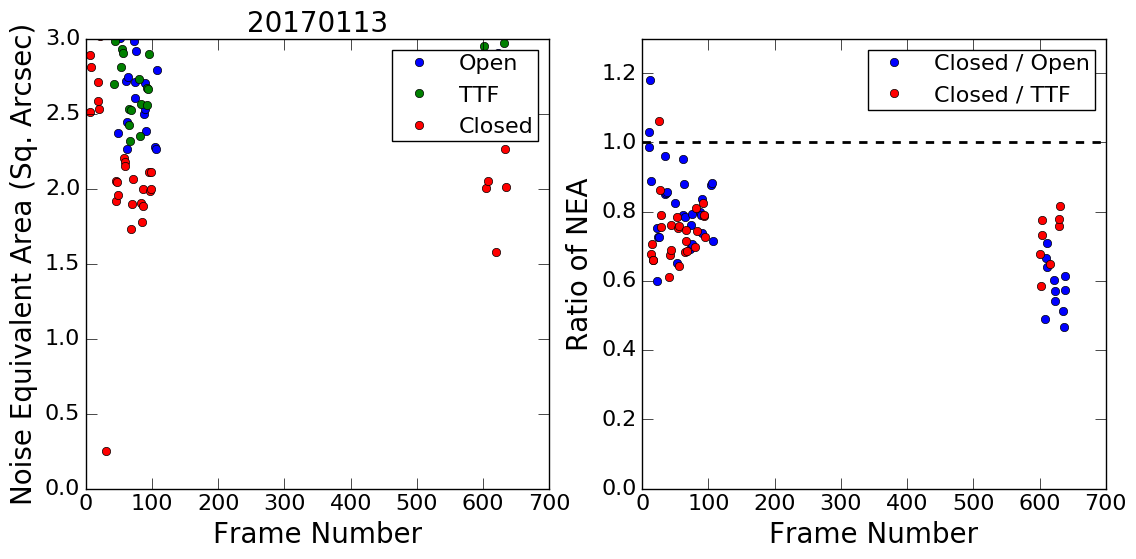

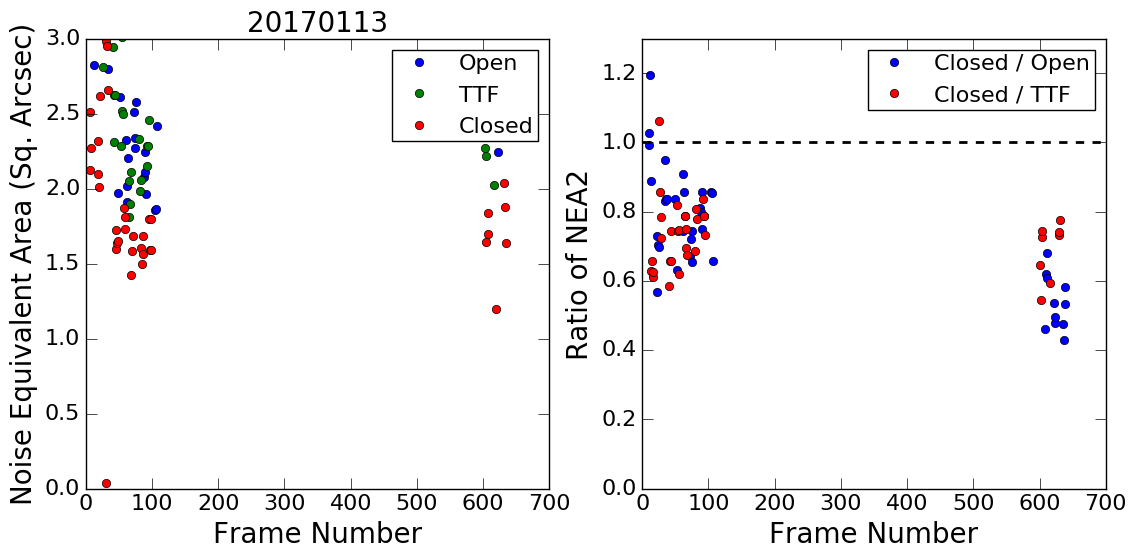

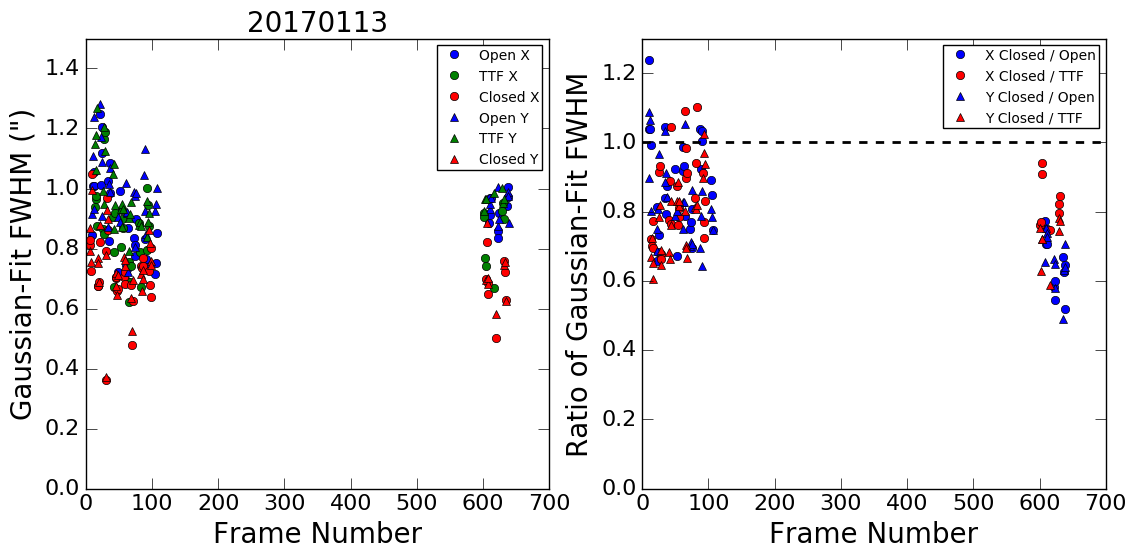

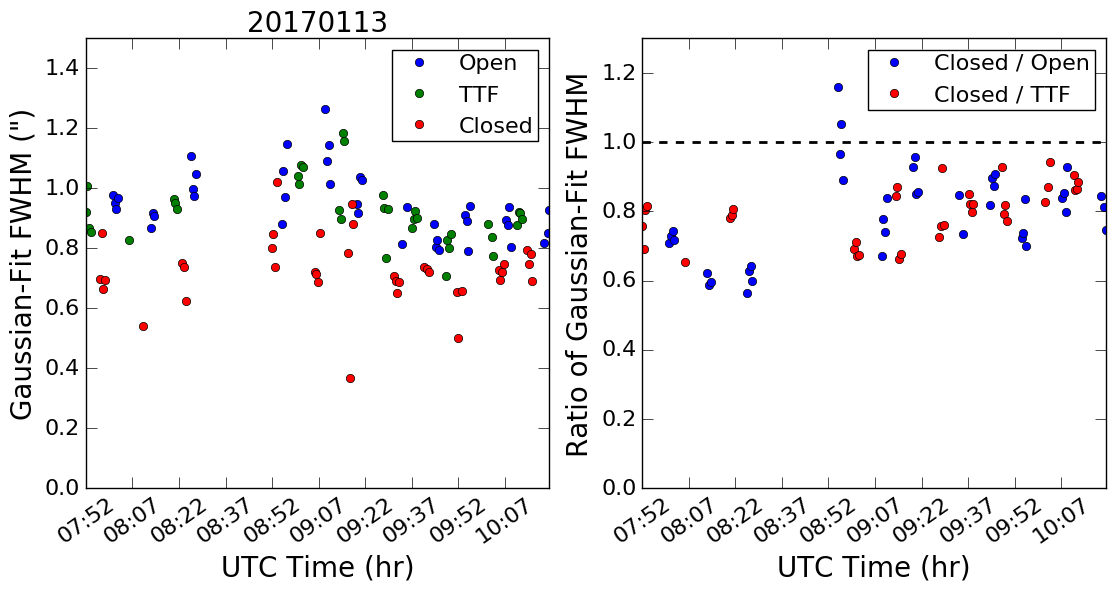

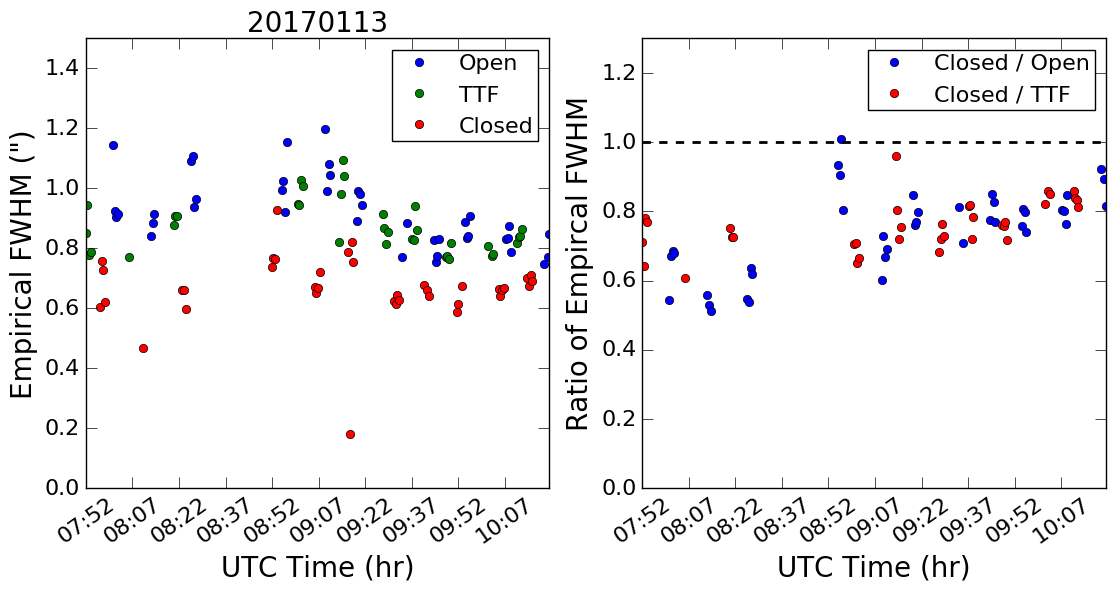

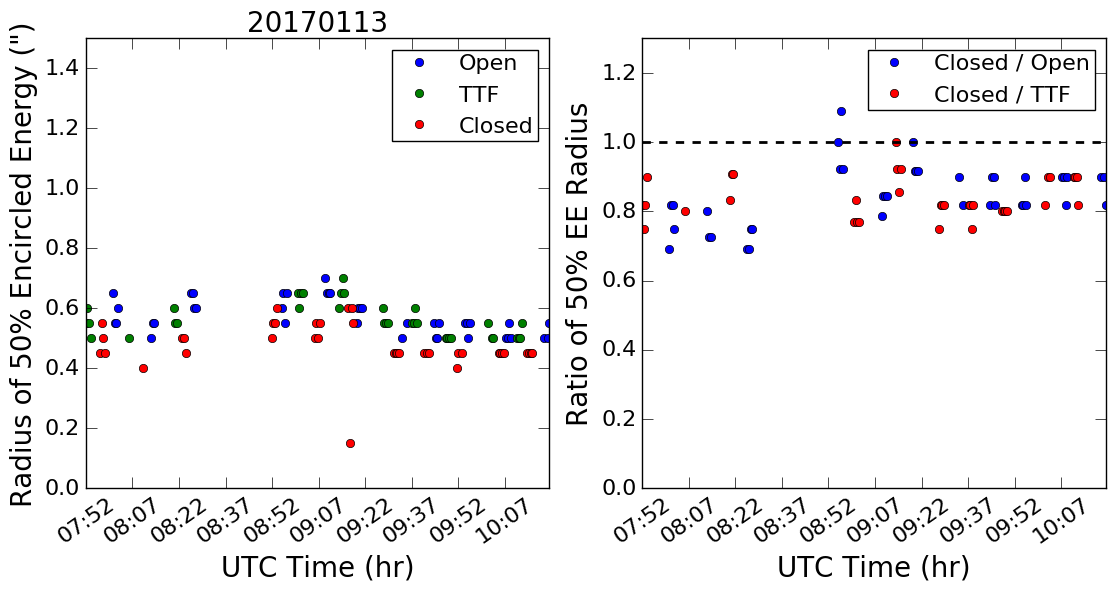

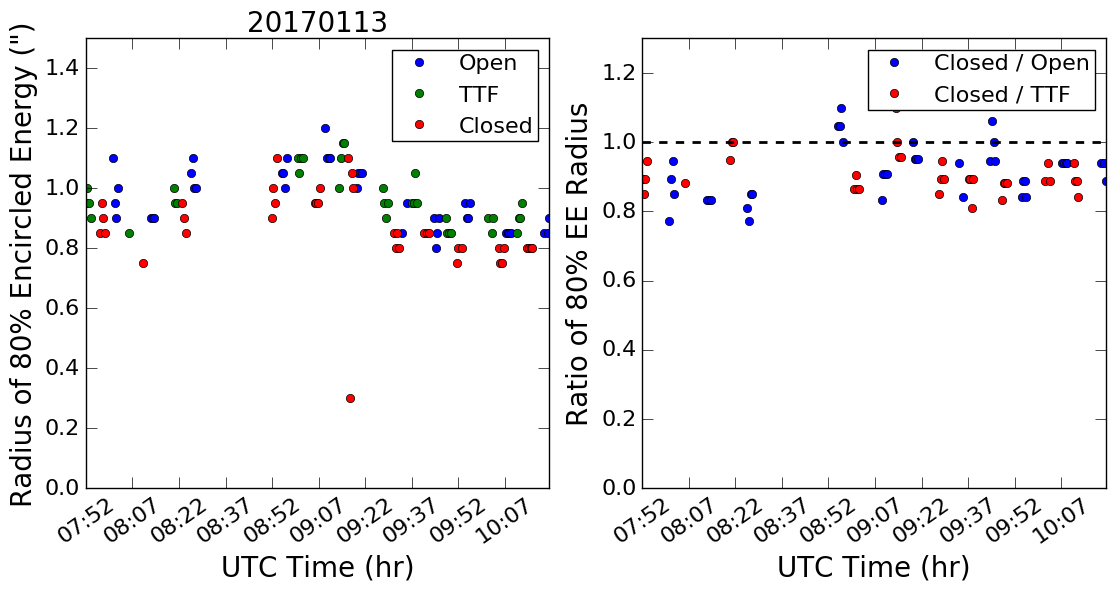

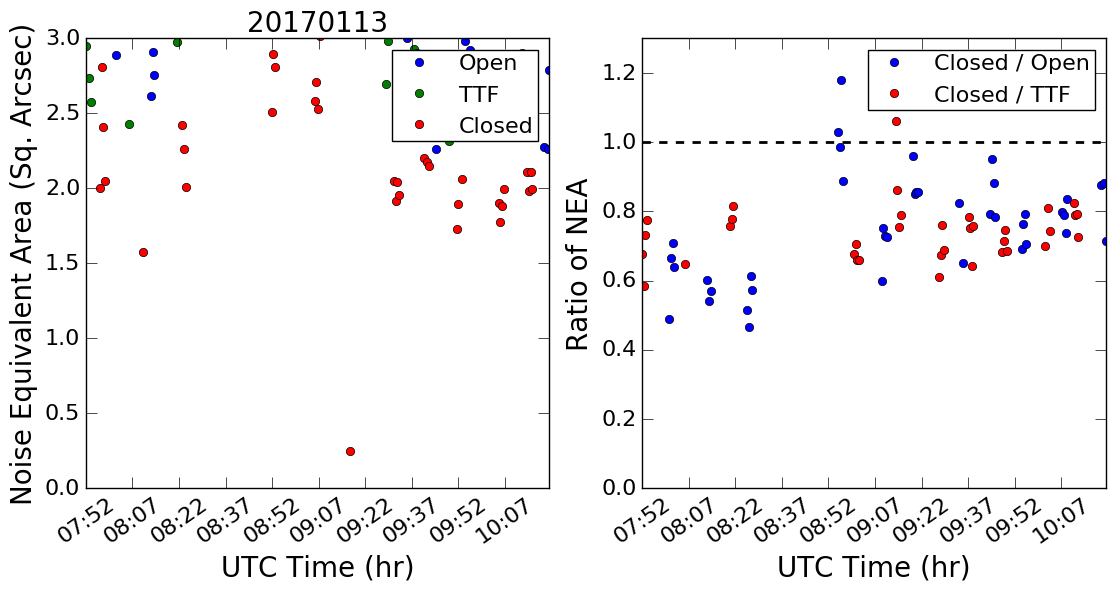

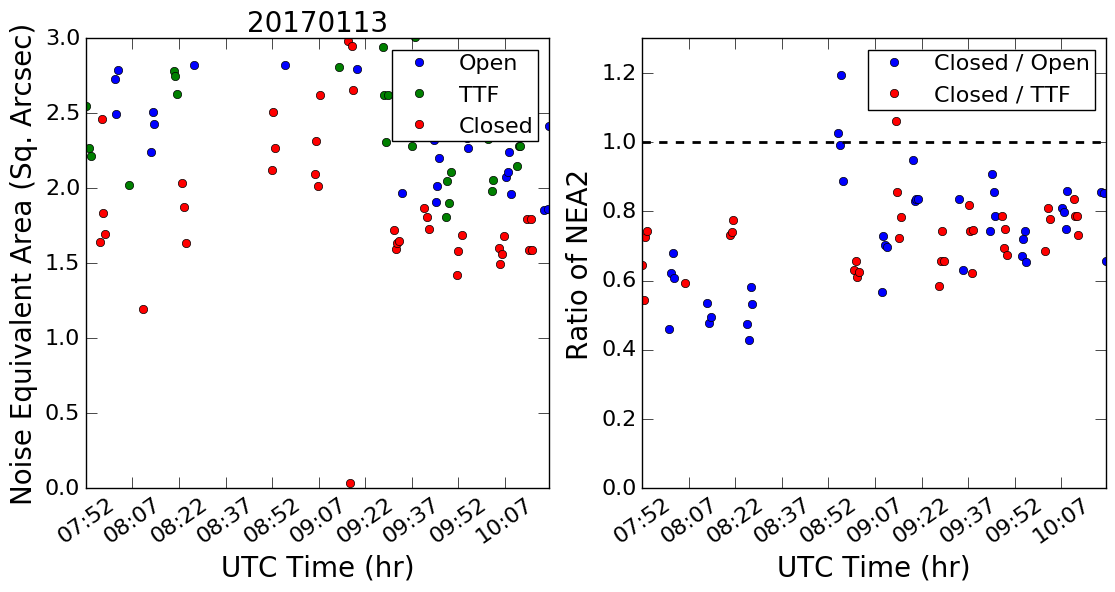

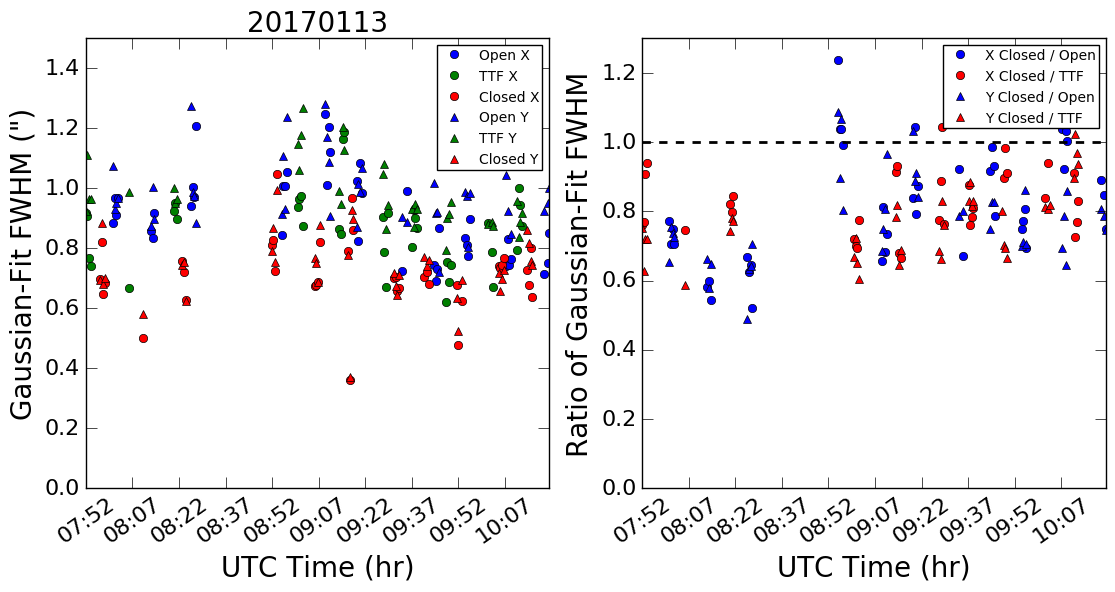

In [9]:
plot_stats.plot_stack_stats('20170113', suffix='2')